In [1]:
from g4py import emcalculator, EMSTDpl
from g4py import NISTmaterials, ezgeom

from Geant4 import electron_mass_c2, twopi
from Geant4 import gEmCalculator, gRunManager, gRunManagerKernel, gNistManager
from Geant4.G4materials import G4Material, G4Element
from Geant4.G4global import G4String
from Geant4 import MeV, microbarn, barn, meter, centimeter, cm2, gram, cm3, kilogram, meter3, cm
from Geant4.G4particles import G4ParticleTable
from Geant4.hepunit import electron_charge, kilovolt, keV

from numpy import ndarray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**************************************************************
 Geant4 version Name: geant4-10-04-patch-01    (28-February-2018)
                       Copyright : Geant4 Collaboration
                      References : NIM A 506 (2003), 250-303
                                 : IEEE-TNS 53 (2006), 270-278
                                 : NIM A 835 (2016), 186-225
                             WWW : http://geant4.org/
**************************************************************

Visualization Manager instantiating with verbosity "warnings (3)"...


In [2]:
NISTmaterials.Construct()
ezgeom.Construct()
EMSTDpl.Construct()

#Ищем материал
matName = G4String("G4_AIR")
material = gNistManager.FindOrBuildMaterial(matName)

ezgeom.SetWorldMaterial(material)
gRunManager.Initialize()
gRunManagerKernel.RunInitialization()

True

In [4]:

def crossSection(ekin):
    particle = "e-"
    process = "eBrem"
    # расчет сечения для атома!! Для матриала нужно пересчитать с учтетом его состава
    element = gNistManager.FindOrBuildMaterial("G4_C").GetElementVector()[0]
    return gEmCalculator.ComputeCrossSectionPerAtom(float(ekin), 
                                             G4String(particle),
                                             G4String(process),
                                             element) / barn

crossSection = np.vectorize(crossSection)

In [5]:
print("Сечение тормозного излучения: " +str(crossSection(1.)) + " barn")

Сечение тормозного излучения: 3.383583816257568 barn


In [26]:

def deDx(ekin):
    particle = "e-"
    return gEmCalculator.ComputeElectronicDEDX(float(ekin), 
                                             G4String(particle),
                                             G4String("G4_C"),
                                             ) / (MeV/cm)

deDx = np.vectorize(deDx)

In [5]:
def deDxTotal(ekin, matName = "G4_AIR"):
    particle = "e-"
    matName = G4String(matName)
    material = gNistManager.FindOrBuildMaterial(matName)
    return gEmCalculator.ComputeTotalDEDX(float(ekin), 
                                             G4String(particle),
                                             matName,
                                             ) / (MeV/cm)

deDxTotal = np.vectorize(deDxTotal)

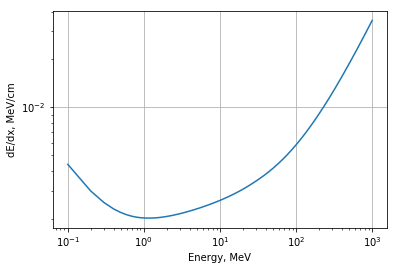

In [9]:
# x = np.linspace(0.1, 1000, 10000)
# data = deDx(x)
# dataTotal = deDxTotal(x)
# plt.plot(x,data,)
plt.plot(data['energy'],data['ionloss'])
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.xlabel('Energy, MeV')
plt.ylabel("dE/dx, MeV/cm");

In [10]:
data = np.array(zip(x, dataTotal), dtype=[('energy', 'd'), ('ionloss', 'd')])
np.save('ion_loss_air', data)

In [11]:
data = np.array(zip(x, deDxTotal(x, matName="G4_Pb")), dtype=[('energy', 'd'), ('ionloss', 'd')])
np.save('ion_loss_lead', data)

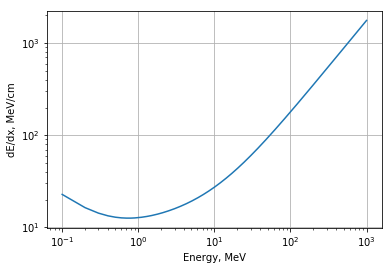

In [12]:
plt.plot(data['energy'],data['ionloss'])
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.xlabel('Energy, MeV')
plt.ylabel("dE/dx, MeV/cm");